## Eigenvalues

*Further Reading: Chpt. 12 in "Programmer's introduction to Mathematics"*

Let $A$ be a square matrix. A non-zero vector $\mathbf{v}$ is an [eigenvector](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) for $A$ with [eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) $\lambda$ if

$$
A\mathbf{v} = \lambda \mathbf{v}
$$

Rearranging the equation, we see that $\mathbf{v}$ is a solution of the system of equations

$$
\left( A - \lambda I \right) \mathbf{v} = \mathbf{0}
$$

where $I$ is the identity matrix of size $n$. 

Intuitively, this definition means that multiplying $A$ by the vector $v$ results in a new vector that points in the same direction as $v$, but is scaled by a factor $\lambda$.

In a vague sense, the eigenvectors and eigenvalues of a linear map encode the "most important data" about that map in a natural, efficient way. It's similar to studying the roots of a polynomial equation.

More concretely, eigenvectors provide the “right” basis in which to study a linear map $V → V$ . They transform our perspective so that the important features of a map can be studied in isolation. If you accept that premise, it’s no surprise that eigenvalues are useful for computation. But to say anything more concrete than that, to explain the universality of eigenvalues, is difficult.

In [1]:
import numpy as np

A = np.array([[ 2., 1. ],
              [ 1., 2. ]])

from numpy import linalg as lg
l = lg.eigvals(A)
print(l)

[3. 1.]


### Spectral theory

We often call eigenvalue-based algorithms "spectral", like the spectral embedding and spectral clustering algorithms.

This is a historical artifact because the eigenvalues of some functions in physics denote the spectrum of light (don't quote me on this). You can also assume it's because eigenvaluees are spooky, like ghosts.

**Eigenvalues on graphs**

The study of eigenvalues of the adjacency matrix (or rather, the [Laplacian Matrix](https://en.wikipedia.org/wiki/Laplacian_matrix)) of a graph is a whole subfield of math by itself, "spectral graph theory".

The eigenvalues denote the "stable state" of the graph, which you could imagine if the edges were springs pulling on the nodes:

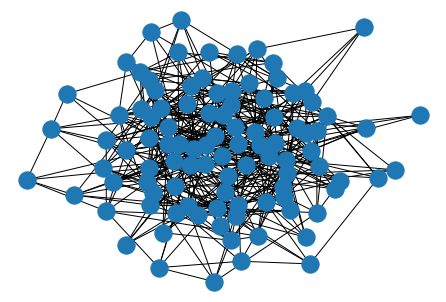

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.sparse as sparse
import scipy.sparse.linalg as sla

G = nx.gnp_random_graph(100, 0.1)
nx.draw(G)

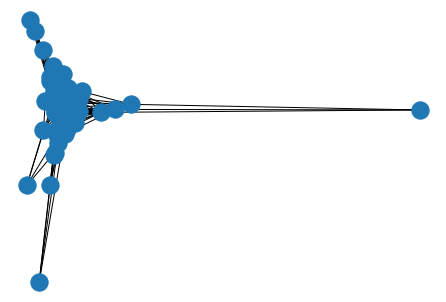

In [3]:
nx.draw_spectral(G)

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, and for feature extraction and engineering.

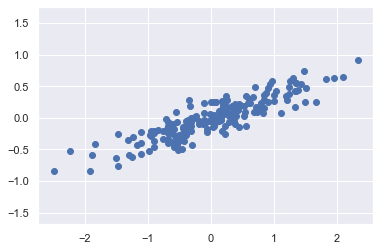

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.


This is well fit by linear regression, but the problem setting here is slightly different: we want to **decompose** the relationship in an **unsupervised learning** manner rather than using $y$ as supervised learning labels.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

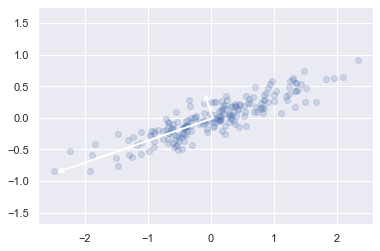

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" (in terms of explained variance) that axis is in describing the distribution of the data.

The projection of each data point onto the principal axes are the "principal components" of the data.

You can think of this similarly to least squares method:

![](pca.gif)

Necessarily, each other principal component is uncorrelated to  each other, so they're orthogonal (at 90 degrees).

PCA is found by eigendecomposition of the covariance matrix of the data. The implementation is actually quite short:

In [9]:
def pca(X):
    # Data matrix X, assumes 0-centered
    n, m = X.shape
    assert np.allclose(X.mean(axis=0), np.zeros(m))
    # Compute covariance matrix
    C = np.dot(X.T, X) / (n-1)
    # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
    # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return X_pca

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

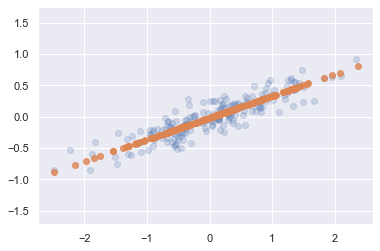

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

We start by loading the data:

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [13]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

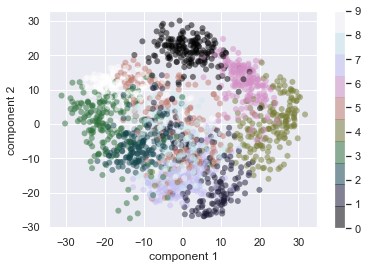

In [14]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

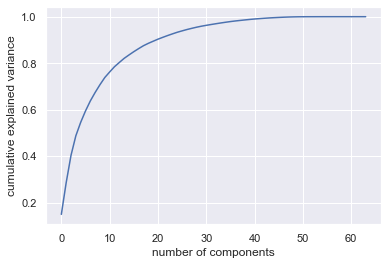

In [15]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

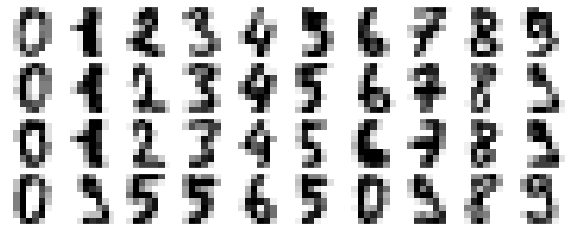

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

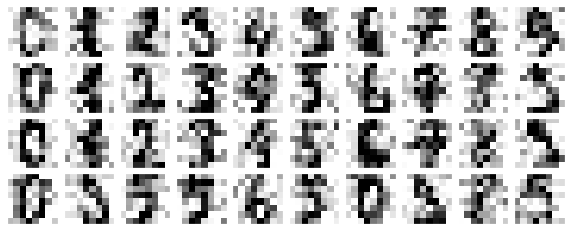

In [17]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [18]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

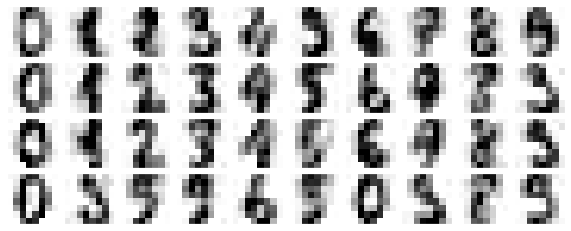

In [19]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Principal Component Analysis Summary

PCA's main weakness is like the one in OLS: it tends to be affected by outliers in the data.

For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.

# Singular Value Decomposition (SVD)

A great place to learn more on SVD is [these blog posts](https://jeremykun.com/2016/04/18/singular-value-decomposition-part-1-perspectives-on-linear-algebra/) or (same author) the chapter on SVD in the PIM textbook.

You can also [read here](https://www.semanticscholar.org/paper/The-Netflix-Prize-and-SVD-Gower/ce7b81b46939d7852dbb30538a7796e69fdd407c) how SVD-based methods won the Netflix prize for recommendation systems in the distant past of 2009.

**Definition**

The SVD of an $m \times n$ matrix $A$ is a factorization $A = U \sum V^T$ where $U$ is an $m\times m$ orthogonal matrix, $V$ is an $n\times n$ orthogonal matrix and $\sum$ is a diagonal matrix with non-negative real numbers.

The diagonal values of $\Sigma$ are the **singular values** which we care about.

You can think of SVD as the equivalent to the prime factors of a number, like $21 = 7\times 3$ in real numbers.

In [47]:
U, Sigma, Vh = np.linalg.svd(
    noisy, 
    full_matrices=False,
    compute_uv=True)
svd(U @ np.diag(Sigma)).shape

(1797, 64)

### Relationship between PCA and SVD

PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices. We can look into their relationship by performing SVD on the covariance matrix C:

$C = \dfrac{X^T X}{n-1}$

$ = \dfrac{V\Sigma U^T U \Sigma V^T}{n-1}$

$ = V \dfrac{\Sigma^2}{n-1}V^-1$

From the above derivation, we notice that the result is in the same form with eigen decomposition of $C$, we can easily see the relationship between singular values ($Σ$) and eigenvalues ($Λ$):

$\Lambda = \dfrac{\Sigma^2}{n-1} $

In [48]:
X = noisy
n = X.shape[0]

# Compute covariance matrix
C = np.dot(X.T, X) / (n-1)
# Eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(C)
# SVD
U, Sigma, Vh = np.linalg.svd(X, 
    full_matrices=False, 
    compute_uv=True)
# Relationship between singular values and eigen values:
print(np.allclose(np.square(Sigma) / (n - 1), eigen_vals)) # True

False


We can actually perform PCA using SVD, or vice versa. In fact, most implementations of PCA actually use performs SVD under the hood rather than doing eigen decomposition on the covariance matrix because SVD can be much more efficient and is able to handle sparse matrices.